<a href="https://colab.research.google.com/github/Sapt-pal/VSD_EdgeAI_on_RISCV/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('studentscores.csv')

In [ ]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values

Y=Mx+C

In [ ]:
class Model():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def predict(self,X):
        return X.dot(self.slope) + self.const

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.slope = np.zeros(X.shape[1])
        self.const = 0
        self.X = X
        self.Y = Y
        for i in range (self.iterations):
            self.update_weights()
        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW =- (2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
        db =- 2 * np.sum(self.Y - Y_pred) / self.m

        self.slope = self.slope - self.learning_rate * dW
        self.const = self.const - self.learning_rate * db
        return self


In [ ]:
model = Model(learning_rate = 0.031, iterations = 100000)
model.fit(X,Y)

In [ ]:
Y_pred = model.predict(X)
print(Y_pred)

[26.92318188 52.3402707  33.76624426 85.57800223 36.69898527 17.14737849
 92.4210646  56.25059205 83.62284155 28.87834256 77.75735951 60.16091341
 46.47478866 34.74382459 13.23705714 89.48832358 26.92318188 21.05769985
 62.11607409 74.8246185  28.87834256 49.40752968 39.63172629 69.9367168
 78.73493985]


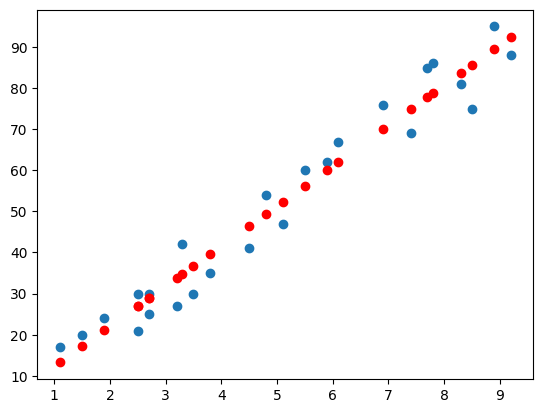

In [ ]:
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.scatter(X, Y_pred, color = "red")
plt.show()


In [ ]:
print(model.slope, model.const)

[9.77580339] 2.483673405373173
